Microwave Radiometer (MWR) MP3000A data download from GO-AMAZON project on ARM (ATMOSPHERIC RADIATION MEASUREMENT)

Description: Microwave Radiometer Retrievals (MWRRET) of Cloud Liquid Water and Precipitable Water Vapor

Site: Manacapuru, Amazonas, Brazil; Mobile Facility (GOAMAZON) (MAO)

Location: Manacapuru, Amazonas, Brazil; AMF1

Facility Code: M1

Category: Cloud Properties

Data Type: Routine Data 

Source Instrument/Data: CEIL, INTERPSONDE, MET, MPL, MPLCMASK, MWR, MWRP, MWRRET, SONDE, SONDEGRID, WACRARSCL View Less

Sampling Interval: 20.000000 seconds

Start Date: 2014-01-08 ------------ End Date: 2015-12-01

DOI: 10.5439/1027369

Import the packages


In [12]:
import act
import matplotlib.pyplot as plt

# First import the NetCDF4 package
from netCDF4 import Dataset
from netCDF4 import MFDataset

# Next import plotting functions
from pylab import *

from datetime import date, datetime

In [13]:
data = datetime.today()
hoje = data.strftime('%d-%m-%Y')
hora = data.strftime('%H-%M-%S')

# Place your username and token here
my_arm_username = 'LourencoCavalcante' 
api_access_token = '311d84bc76093a97' #https://adc.arm.gov/armlive/register

#Site: Manacapuru, Amazonas, Brazil; Mobile Facility (GOAMAZON) (MAO)
# GO - AMAZON (Start: 2014-01-08 for End: 2015-12-01)
datastream = 'maomwrret1liljclouM1.c2' #maomwrlosM1.b1 or maomwrret1liljclouM1.c2
date_start = '2014-06-01' 
date_end = '2014-06-01'

# Download MWR data on ARM
act.discovery.download_data(my_arm_username, api_access_token, datastream, date_start, date_end) 

[DOWNLOADING] maomwrret1liljclouM1.c2.20140601.000007.cdf


['l:\\GitHub\\CAP-Dissertation-Complementary-studies\\Notebooks\\maomwrret1liljclouM1.c2\\maomwrret1liljclouM1.c2.20140601.000007.cdf']

Code to plot ARM NetCDF data

KeyError: 'vap'

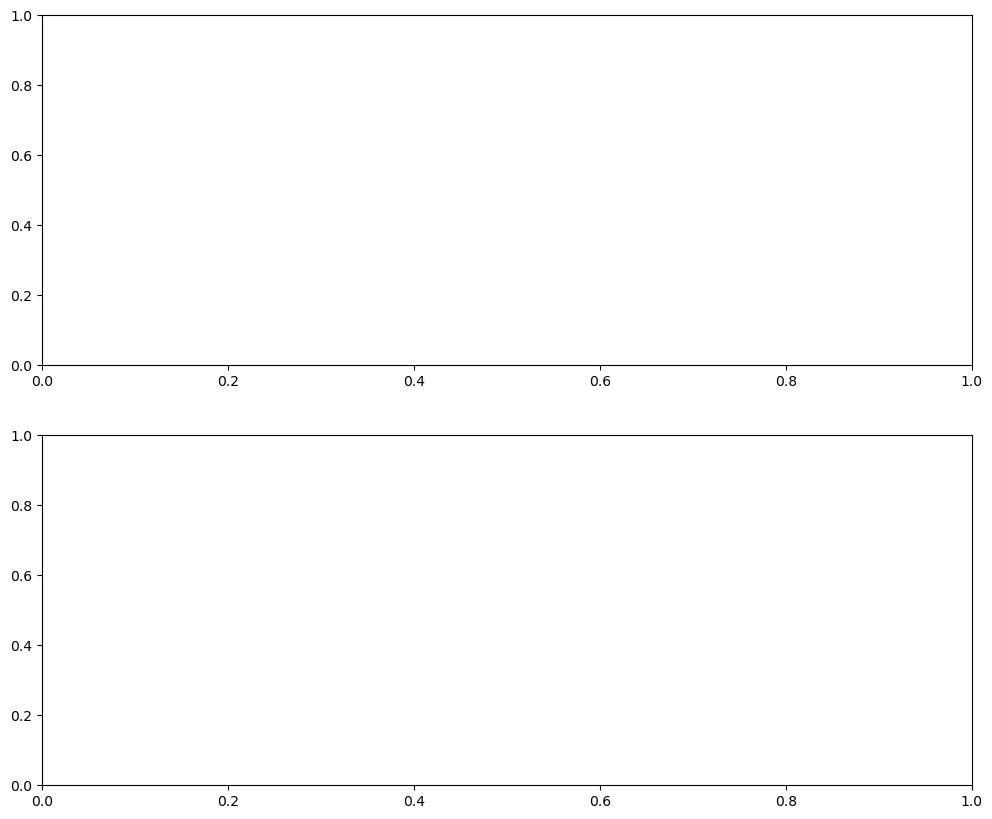

In [14]:
#Access directores files downloaded
mwr_mp3000a_ds = act.io.armfiles.read_netcdf(f'{datastream}/{datastream}.*.cdf')
ceil_ds = act.io.armfiles.read_netcdf(f'{datastream}/{datastream}.*.cdf')


# Create a TimeSeriesDisplay object
mwr_mp3000a_ds = mwr_mp3000a_ds.resample(time='1min').nearest()
ceil_ds = ceil_ds.resample(time='1min').nearest()

display = act.plotting.TimeSeriesDisplay(
   {'20151119': mwr_mp3000a_ds, '20151120': ceil_ds},
   subplot_shape=(2,), figsize=(12,10)
)

# Plot data
display.plot('vap', dsname='20151119', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(0,), label='cbh')
display.plot('vap', dsname='20151120', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(0,))

display.plot('vap', dsname='20151119', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(1,), label='cbh')
display.plot('liq', dsname='20151120', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(1,))
plt.savefig(f'{datastream}/output/figures/{hoje}_{hora}_{datastream}.png')

REFERENCES:

@misc{zhang, title={MWR Retrievals (MWRRET1LILJCLOU)}, DOI={10.5439/1027369}, journal={Atmospheric Radiation Measurement (ARM) user facility}, author={Zhang, Damao} }

In [ ]:

# Load the NetCDF file into a data object
#data = MFDataset('/home/maou/Área de Trabalho/Victor/Estágio/Dados de Satelite/*.09.2015 Antartica.nc', mode='r') **#Aqui eu gostaria de colocar outros 29 dados e não sei como.**

#nc_file = Dataset('maomwrlosM1.b1.20151117.000031.cdf','r',format='NETCDF4_CLASSIC')
nc_file = MFDataset('L:/GitHub/CAP-Dissertation-Complementary-studies/Notebooks/maomwrlosM1.b1/maomwrlosM1.b1.*.cdf','r')
#print(nc_file.variables)
# Load the time and temperature as data objects

temp_obj = nc_file.variables['sky31']
time_obj = nc_file.variables['time']
# Load the time and temperature data into the workspace

temperature = temp_obj[:]
time = time_obj[:]
# Convert the time from seconds since midnight GMT to hours since midnight GMT
time_hour = time/3600
# Now plot the data
# Setup the plot

display = plot(figsize=(15, 10))

# Plot temperature data in top plot


plot(time_hour, temperature)
# Limit the axes ranges
xlim(0,24)
# You can also force the ticks to be at 6-hour intervals (for example)
xticks([0,6,12,18,24])
# Add axes labels and a title
xlabel(nc_file.variables['time'].long_name )
ylabel(nc_file.variables['tbsky23'].long_name)
title(nc_file.variables['time'].units)
# Output as a PNG format file
savefig('testplot.png', format='png')
# When plotting from within a script you have to instruct the script to display the output
show()

#print(nc_file.variables['tbsky23'].long_name)

In [1]:

# Read in AERIoe and ceilometer data
aerioe_ds = act.io.armfiles.read_netcdf('sgpaerioe1turnC1.c1/sgpaerioe1turnC1.c1.20220211.000354.nc')
ceil_ds = act.io.armfiles.read_netcdf('sgpceilC1.b1/sgpceilC1.b1.20220211.000005.nc')

# There isn't information content from the AERI above 3 km
# Remove data with a height above 3 km
aerioe_ds = aerioe_ds.sel(height=aerioe_ds.coords['height'] <= 3)

# Convert Ceilometer cloud base height to km
ceil_ds['first_cbh'] = ceil_ds['first_cbh']/1000

# Remove first_cbh if it is higher than 3 km
ceil_ds['first_cbh'] = ceil_ds['first_cbh'][~(ceil_ds['first_cbh'] > 3)]

# Create a TimeSeriesDisplay object
display = act.plotting.TimeSeriesDisplay(
   {'AERIoe': aerioe_ds, 'Ceilometer': ceil_ds},
   subplot_shape=(2,), figsize=(15,10)
)

# Plot data
display.plot('first_cbh', dsname='Ceilometer', marker='+', color='black', markeredgewidth=3,
   linewidth=0, subplot_index=(0,), label='cbh')
display.plot('temperature', dsname='AERIoe', cmap='viridis', set_shading='nearest',
   add_nan=True, subplot_index=(0,))

display.plot('first_cbh', dsname='Ceilometer', marker='+', color='black', markeredgewidth=3,
   linewidth=0, subplot_index=(1,), label='cbh')
display.plot('waterVapor', dsname='AERIoe', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(1,))

plt.savefig('sgpaerioe1turnC1.c1.20220211.png')

NameError: name 'act' is not defined